In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Read orginal data and prepare it
data = pd.read_csv("data/VAA.csv")

data = data.dropna()
replacements = {
    "Lidt enig":1,
    "Enig":2,
    "Lidt uenig":-1,
    "Uenig":-2
}
data.iloc[:,-25:] = data.iloc[:,-25:].replace(replacements)

data = data[data.Party != ': Uden for partierne' ]
X = data.iloc[:,4:]
y = data.iloc[:,1]

In [ ]:
##select training vs test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20,random_state = 41)

In [ ]:
#create pipeline with parameters to tune
pipeline = Pipeline(
    [('pca',PCA()),
     ('model',QuadraticDiscriminantAnalysis())
    ])
parameters = {'pca__n_components':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}


In [ ]:
#find the best hyperparameters
clf = GridSearchCV(pipeline, parameters,scoring = "accuracy")
clf.fit(X_train, y_train)

print(clf.best_params_)
clf.cv_results_

#accuracy stops improving after 5 so we will use 5 components

In [ ]:
#making the model with the optimal hyperparameter
final_pipeline = Pipeline(
    [('pca',PCA(n_components = 5)),
     ('model',QuadraticDiscriminantAnalysis())
    ])

#fit on all
final_pipeline.fit(X, y)

#saves model as a file to load in the function, saves fitting it each time the function is called
joblib.dump(final_pipeline, 'model/QDA_Pipeline.pkl')

['model/QDA_Pipeline.pkl']

The chosen number of components was 5 for the QDA model, these 5 PCs explained 72.96520512818027% of the variance in the data


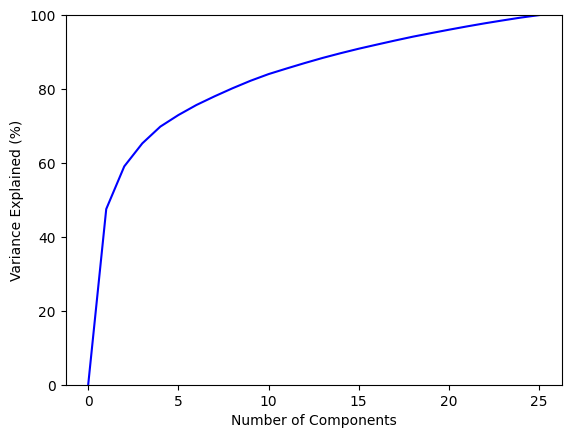

In [ ]:
#exploring variance explained
pca5 = PCA(n_components=25)
pca5.fit(data.iloc[:,-25:])
vars = [0]
[vars.append(i) for i in np.cumsum(pca5.explained_variance_ratio_)]
vars = np.array(vars)
# investigating the var expl. at 5 PCs
print(f"The chosen number of components was 5 for the QDA model, these 5 PCs explained {vars[5]*100}% of the variance in the data")
plt.plot([i for i in range(26)], vars*100, c='blue')
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained (%)")
plt.ylim(0,100);
plt.savefig("QDA pics/variance_explained.png", dpi=300, bbox_inches='tight')